<a href="https://colab.research.google.com/github/Dzy00/CHL5230-datathon2/blob/main/CHL5230_datathon2_Team6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset #1: Mortality Dataset for Cardiovascular Disease Complications

logistic regression

(299, 13)
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


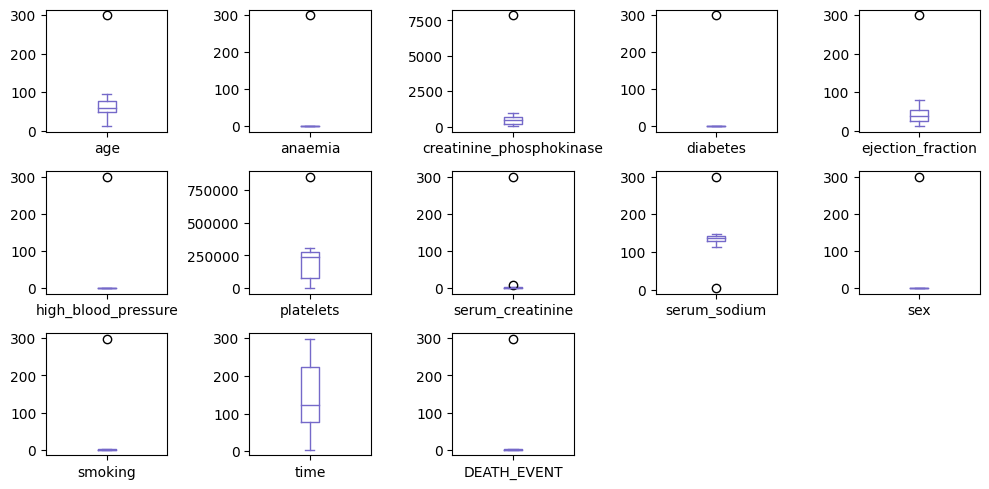

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


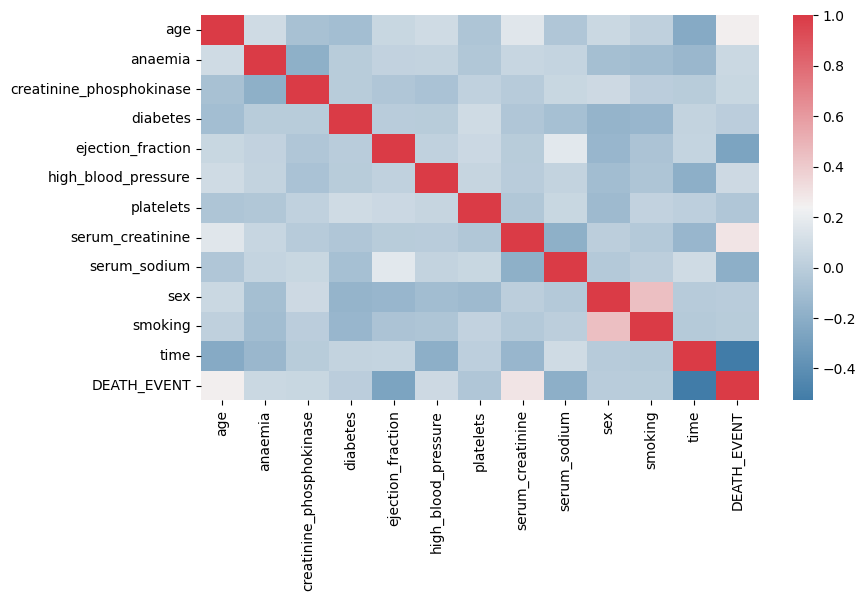

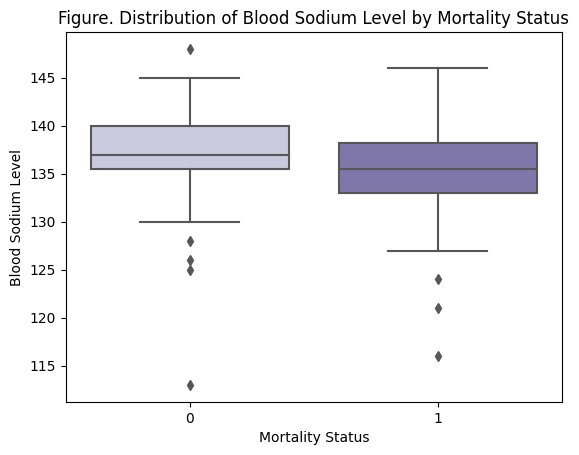

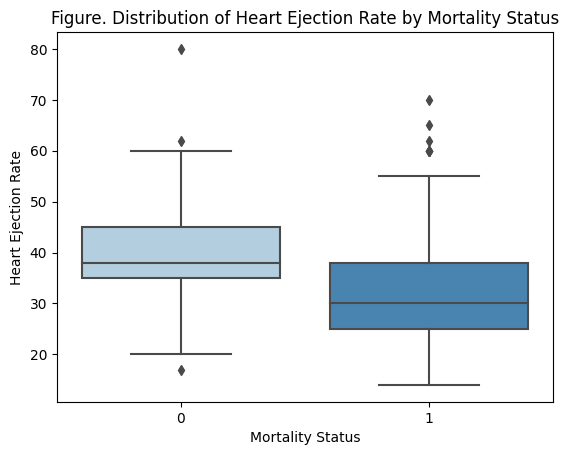

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.6 MB/s eta 0:00:00


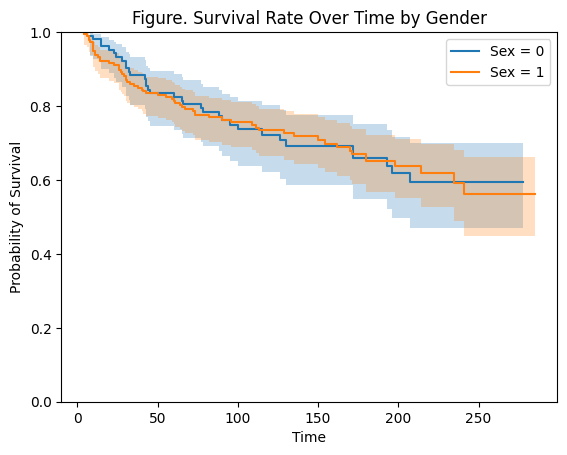

In [5]:
# dataset 1: Mortality Dataset for Cardiovascular Disease Complications

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# read dataset
mortal_df = pd.read_csv('Mortality Dataset.csv')
mortal_df.head()

# check dimension of the dataset
print(mortal_df.shape)

# list the columns of the dataframe
print(mortal_df.columns)

# summary statistics
description = mortal_df.describe()
description
description.plot(kind='box', subplots=True, layout=(3, 5), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

# check missing value
# no NA
print(mortal_df.isnull().sum())

# visualize the data with histogram
plt.figure(figsize=(9,5))

# correlation matrix between variables
mortal_Mcorr = mortal_df.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True) # customerize cmap color
sns.heatmap(mortal_Mcorr, annot=False, cmap=cmap)
plt.show()

# Gender
sns.boxplot( x=mortal_df['DEATH_EVENT'], y=mortal_df['serum_sodium'], palette="Purples")
plt.title('Figure. Distribution of Blood Sodium Level by Mortality Status')
plt.xlabel('Mortality Status')
plt.ylabel('Blood Sodium Level')
plt.show()

# ejection fraction
sns.boxplot( x=mortal_df['DEATH_EVENT'], y=mortal_df['ejection_fraction'], palette="Blues")
plt.title('Figure. Distribution of Heart Ejection Rate by Mortality Status')
plt.xlabel('Mortality Status')
plt.ylabel('Heart Ejection Rate')
plt.show()

# servival analysis by gender
!pip install scikit-survival
from sksurv.nonparametric import kaplan_meier_estimator

# encode the 'DEATH_EVENT' to bool for survival analysis
mortal_df['DEATH_EVENT_bool'] = mortal_df['DEATH_EVENT'].map({0: False, 1: True})
mortal_df.head()

for sex in (0, 1):
    mask_treat = mortal_df["sex"] == sex
    time, survival_prob, conf_int = kaplan_meier_estimator(
        mortal_df["DEATH_EVENT_bool"][mask_treat],
        mortal_df["time"][mask_treat],
        conf_type="log-log",
    )

    plt.step(time, survival_prob, where="post", label=f"Sex = {sex}")
    plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")

plt.ylim(0, 1)
plt.title('Figure. Survival Rate Over Time by Gender')
plt.ylabel("Probability of Survival")
plt.xlabel("Time")
plt.legend(loc="best")
plt.show()